# CNN with Keras by bgo_3 

케라스를 사용해서 CNN 분류기를 학습시켜 볼 것이다.    

우리의 전력은 학습 데이터 12000개 중 20%를 검증 데이터로 사용하여 분류기를 최적화시키는 것이다. 테스트 데이터는 그대로 놔두고 정말 마지막에 모델의 정확도를 평가할 때 사용한다.     

# Generate dataset

In [4]:
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [5]:
# 데이터 로드
data_train = pd.read_csv('../data/fashion-mnist_train.csv')
data_test = pd.read_csv('../data/fashion-mnist_test.csv')

In [7]:
# 입력 이미지 크기
img_rows, img_cols = 28,28
input_shape = (img_rows,img_cols,1)

# numpy 배열로 변환
X = np.array(data_train.iloc[:,1:])
y = to_categorical(np.array(data_train.iloc[:,0]))

> **np_utils.to_categorical(클래스, 클래스의 함수)**     
함수 정수 숫자를 -> [0,0,1,0,0,0]처럼 바꿔서 구분하는 것.
즉 원 핫 인코딩

In [12]:
print(data_train.iloc[:,0].unique()) 
y[0]   # 10개의 클래스를 원-핫 인코딩으로 구분해줌

[2 9 6 0 3 4 5 8 7 1]


array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [13]:
# 학습/검증 데이터 셋으로 분리
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size = 0.2, random_state = 13)

In [14]:
# 테스트 데이터도 numpy 배열로 변환
X_test = np.array(data_test.iloc[:,1:])
y_test = to_categorical(np.array(data_test.iloc[:,0]))

In [18]:
# 1차원 데이터를 2차원 이미지 데이터로 변환
X_train = X_train.reshape(X_train.shape[0],img_rows,img_cols,1) # (48000,28,28,1)
X_test = X_test.reshape(X_test.shape[0],img_rows,img_cols,1)
X_val = X_val.reshape(X_val.shape[0],img_rows,img_cols,1)

# 0-1 값으로 정규화
X_train = X_train.astype('float32')
X_train /= 255 
X_test = X_test.astype('float32')
X_test /= 255
X_val =X_val.astype('float32')
X_val /= 255

# Modeling 

In [19]:
import tensorflow.keras as keras 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization

In [30]:
batch_size = 256 #배치 크기
num_classes = 10 # 분류할 클래스 개수
epochs = 50      #epochs

In [21]:
model = Sequential()

In [22]:
# 모델 설계

#Conv Layer1 
model.add(Conv2D(32, kernel_size =(3,3),activation='relu',
                kernel_initializer = 'he_normal',input_shape = input_shape))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

#Conv Layer 2 
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size =(2,2)))
model.add(Dropout(0.25))

#Conv Layer 3
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Dropout(0.4))

# 데이터 평탄화
model.add(Flatten())

#Dense Layer 1 
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))

# Dense Layer2 
model.add(Dense(num_classes,activation='softmax'))

In [27]:
# 모델 컴파일
# 1. 최적화 알고리즘 : Adam
# 2. 비용 함수 : 카테고리형 Cross Entropy 
# 3. 평가지표 : 정확도
model.compile(loss = keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adam(), metrics=  ['accuracy'])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         7

# Training 

In [32]:
# 모델 학습
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs
                   ,validation_data=(X_val, y_val))

# 모델 성능 평가
score = model.evaluate(X_test, y_test, verbose=0)

Epoch 1/50
188/188 [==============================] - 23s 122ms/step - loss: 0.5098 - accuracy: 0.8093 - val_loss: 0.4139 - val_accuracy: 0.8488
Epoch 2/50
188/188 [==============================] - 28s 150ms/step - loss: 0.4466 - accuracy: 0.8355 - val_loss: 0.3691 - val_accuracy: 0.8639
Epoch 3/50
188/188 [==============================] - 27s 146ms/step - loss: 0.4076 - accuracy: 0.8517 - val_loss: 0.3545 - val_accuracy: 0.8643
Epoch 4/50
188/188 [==============================] - 28s 147ms/step - loss: 0.3813 - accuracy: 0.8607 - val_loss: 0.3221 - val_accuracy: 0.8811
Epoch 5/50
188/188 [==============================] - 28s 151ms/step - loss: 0.3589 - accuracy: 0.8692 - val_loss: 0.3039 - val_accuracy: 0.8885
Epoch 6/50
188/188 [==============================] - 30s 158ms/step - loss: 0.3414 - accuracy: 0.8755 - val_loss: 0.3024 - val_accuracy: 0.8879
Epoch 7/50
188/188 [==============================] - 30s 159ms/step - loss: 0.3304 - accuracy: 0.8800 - val_loss: 0.2838 - val_ac

In [33]:
print('test loss :',score[0])
print('test accuracy:',score[1])

test loss : 0.2053152173757553
test accuracy: 0.9277999997138977


# Results 

## Plotting accuracy and loss 

In [34]:
import matplotlib.pyplot as plt 
%matplotlib inline 

In [39]:
history.history

{'loss': [0.5098088979721069,
  0.4466405510902405,
  0.4075816571712494,
  0.3813329339027405,
  0.3588636517524719,
  0.3414146602153778,
  0.3304086923599243,
  0.31751787662506104,
  0.3049147129058838,
  0.29886674880981445,
  0.29056277871131897,
  0.28172627091407776,
  0.27866867184638977,
  0.27318084239959717,
  0.2667090892791748,
  0.25799012184143066,
  0.259491503238678,
  0.25446122884750366,
  0.24730747938156128,
  0.2465646117925644,
  0.24191418290138245,
  0.23804596066474915,
  0.23554779589176178,
  0.23432226479053497,
  0.22839437425136566,
  0.2282717078924179,
  0.22405895590782166,
  0.22365809977054596,
  0.21927817165851593,
  0.21924853324890137,
  0.2142532616853714,
  0.21793977916240692,
  0.2135809361934662,
  0.21689318120479584,
  0.20922164618968964,
  0.2087683379650116,
  0.20327669382095337,
  0.20461411774158478,
  0.20214973390102386,
  0.20223262906074524,
  0.19692125916481018,
  0.19984497129917145,
  0.1985250860452652,
  0.1989735513925552

In [36]:
# 정확도
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# 손실함수 값 
loss = history.history['loss']
val_loss = history.history['val_loss']

#epoch 수
epochs = range(len(accuracy))
epochs

range(0, 50)

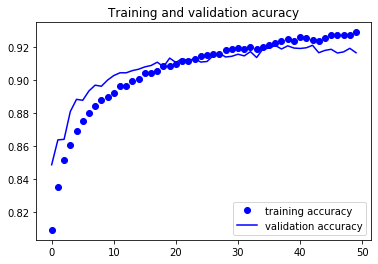

In [40]:
# epoch에 따른 정확도의 변화 시각화
plt.plot(epochs, accuracy, 'bo', label = 'training accuracy')
plt.plot(epochs, val_accuracy, 'b', label = 'validation accuracy')
plt.title('Training and validation acuracy')
plt.legend()
plt.show()

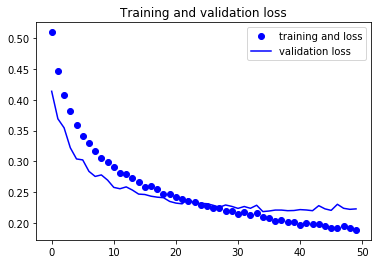

In [41]:
# epoch에 따른 손실함수 값의 변화 시각화
plt.plot(epochs, loss, 'bo', label = 'training and loss')
plt.plot(epochs, val_loss,'b', label = 'validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Classification Report 

In [49]:
# 테스트 데이터 라벨 예측
predicted_classes = model.predict_classes(X_test)

#시각화할 인덱스 추출
y_true = data_test.iloc[:,0]
correct = np.where(predicted_classes ==y_true)[0]
incorrect = np.where(predicted_classes != y_true)[0]

In [44]:
from sklearn.metrics import classification_report 

target_names = ['Class {}'.format(i) for i in range(num_classes)]
print(classification_report(y_true, predicted_classes,target_names= target_names))

              precision    recall  f1-score   support

     Class 0       0.88      0.88      0.88      1000
     Class 1       0.99      0.99      0.99      1000
     Class 2       0.91      0.87      0.89      1000
     Class 3       0.90      0.96      0.93      1000
     Class 4       0.90      0.88      0.89      1000
     Class 5       0.99      0.98      0.99      1000
     Class 6       0.79      0.78      0.79      1000
     Class 7       0.96      0.97      0.96      1000
     Class 8       0.98      0.99      0.99      1000
     Class 9       0.97      0.97      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



우리의 분류기가 Class 6에 대해 정밀도와 recall이 떨어지는 것은 분명하다. Class 2의 경우 정밀도가 다소 떨어지는 편이지만 Class 4의 경우는 recall이 다소 떨어진다.     

아마도 우리는 정확한 예측과 부정확한 예측을 시각화한 후에 더 많은 통찰력을 얻을 수 있을 것이다.  

다음은 정확히 예측된 클래스들의 부분집합이다. 

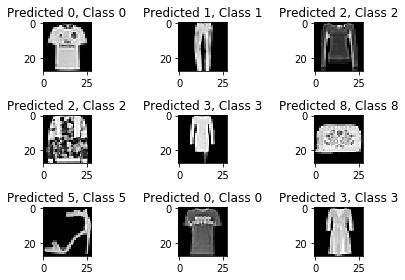

In [51]:
for i, correct in enumerate(correct[:9]) :
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28),cmap='gray')
    plt.title('Predicted {}, Class {}'.format(predicted_classes[correct],y_true[correct]))
    plt.tight_layout()

다음은 부정확하게 예측된 클래스들의 부분집합이다.

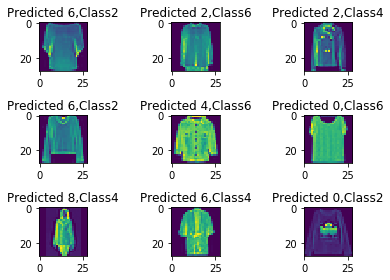

In [52]:
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28))
    plt.title('Predicted {},Class{}'.format(predicted_classes[incorrect],y_true[incorrect]))
    plt.tight_layout()

CNN이 강력한 구조임에도 불구하고 여러 클래스에 존재하는 유사 패턴의 다양성이 분류기의 성능에 영향을 미치는 것으로 보인다. 재킷, 셔츠, 긴팔 블라우스는 다음과 같은 비슷한 패턴을 가지고 있다. : 긴 소매(아니거나), 단추(없거나) 그리고 등등 

## What activations look like 
활성화 값을 시각화해보자!

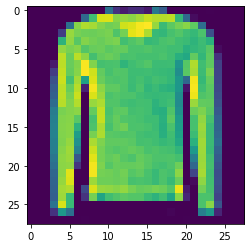

In [53]:
test_im = X_train[154]
plt.imshow(test_im.reshape(28,28))
plt.show()

첫 번째 레이어의 두 번째 채널의 활성화 값을 살펴보자

In [55]:
from tensorflow.keras import models

# 이 모델 ㅣ fumctional_1은 어디서 왔을까?
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activation_model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)         

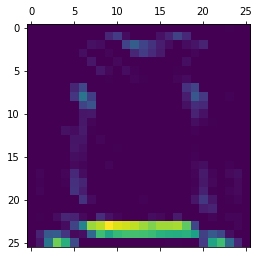

In [66]:
activations = activation_model.predict(test_im.reshape(1,28,28,1))
first_layer_activation = activations[0]
plt.matshow(first_layer_activation[0,:,:,4])

다른 conv layer의 활성화 값을 시각화해보자

In [72]:
layer_names = [] 

for layer in model.layers[: -1] :
    layer_names.append(layer.name)

images_per_row = 16

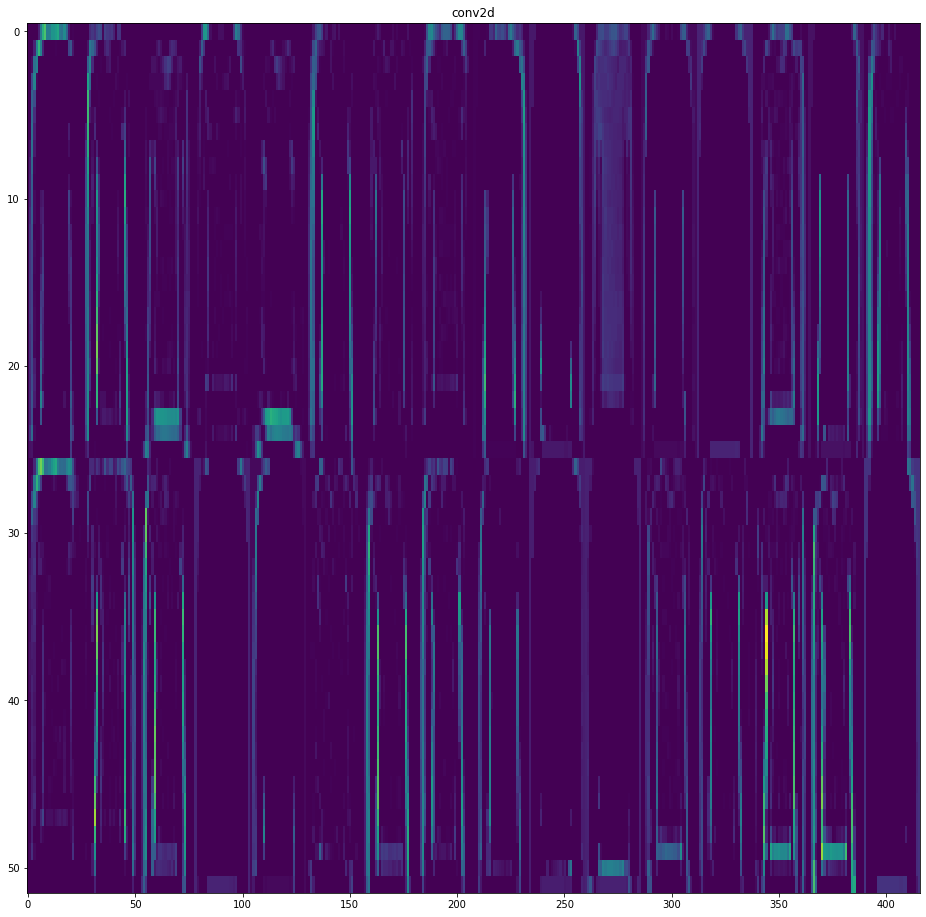

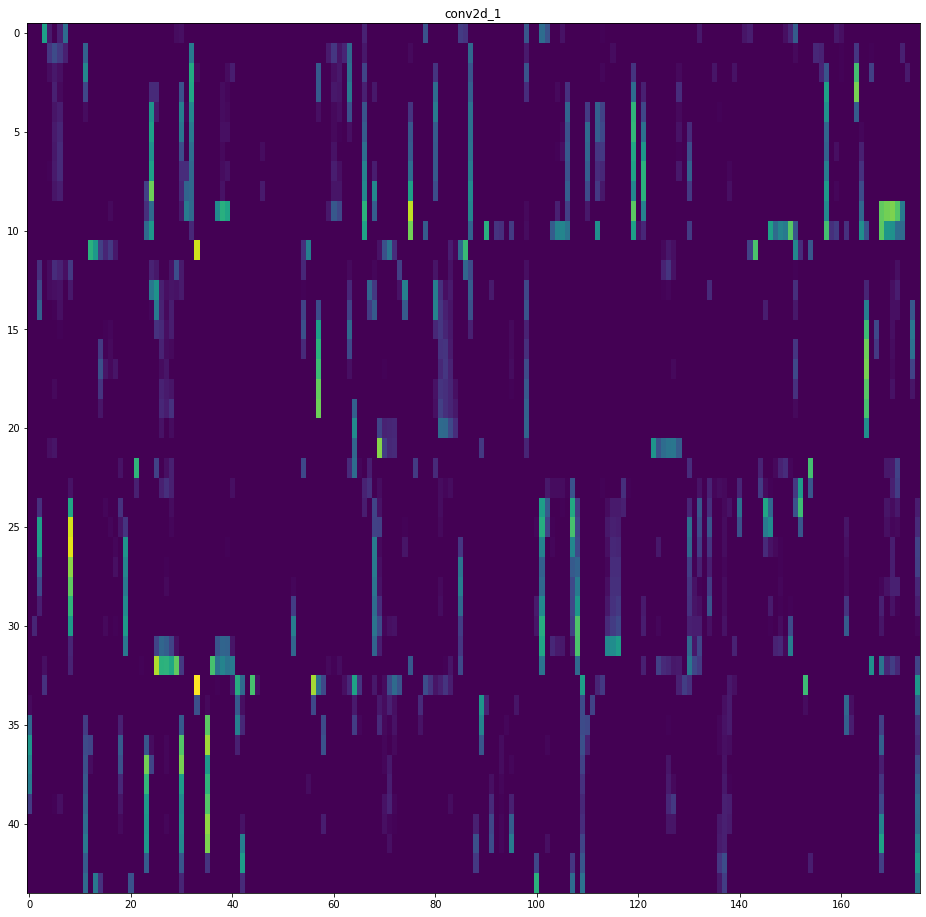

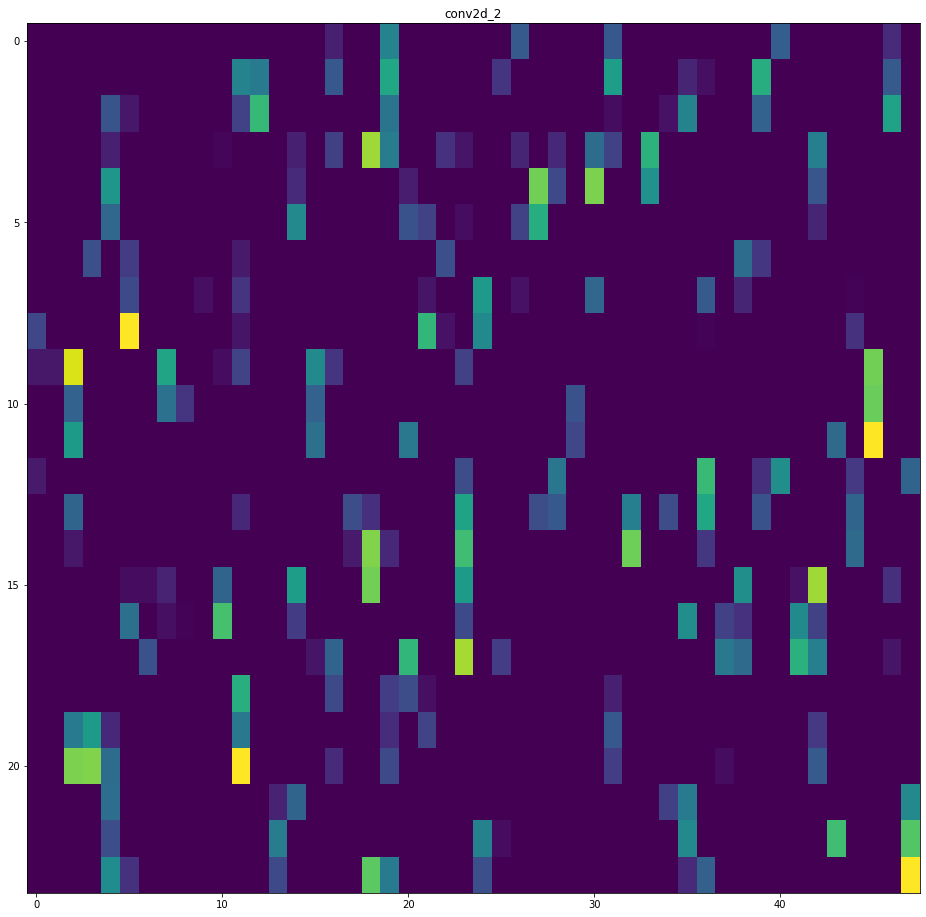

In [73]:
for layer_name, layer_activation in zip(layer_names, activations) :
    if layer_name.startswith('conv'):
        n_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]
        n_cols = n_features // images_per_row 
        display_grid = np.zeros((size*n_cols, images_per_row *size))
        
        for col in range(n_cols) :
            for row in range(images_per_row) :
                channel_image = layer_activation[0,:,:,col*images_per_row+row]
                channel_image *= 64 
                channel_image += 128 
                # channel_image에서 0보다 작은 수들은 0으로 바꿔줌
                channel_image = np.clip(channel_image,0,255).astype('uint8')
                display_grid[col*size:(col +1)*size,row*size:(row+1)*size] = channel_image
        scale = 1. /size
        plt.figure(figsize=(scale* display_grid.shape[1],scale*display_grid.shape[1]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto')
                
                